In [84]:
## To work well with gpu memory
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

#You should  import these packages and  the MNIST dataset

import numpy as np
import mnist
import keras

# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
train_images = mnist.train_images()
train_labels = mnist.train_labels()

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)


/home/kathy/.virtualenvs/keras_py_3_gpu/lib/python3.6/site-packages/tensorflow_core/python/client/session.py:1752: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


(60000, 28, 28)
(60000,)


In [85]:
'''
Before we begin, we’ll normalize the image pixel values from [0, 255] to [-0.5, 0.5] 
to make our network easier to train (using smaller, centered values usually leads to better results). 
We’ll also reshape each image from (28, 28) to (28, 28, 1)
because Keras requires the third dimension.
'''

test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape) # (60000, 28, 28, 1)
print(test_images.shape)  # (10000, 28, 28, 1)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [86]:
'''
Every Keras model is either built using the Sequential class,
which represents a linear stack of layers, or the functional Model class, which is more customizeable.
We’ll be using the simpler Sequential model, since our CNN will be a linear stack of layers.
We start by instantiating a Sequential model:
'''
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

'''
- num_filters, filter_size, and pool_size are self-explanatory variables that set the hyperparameters for our CNN.
- The first layer in any Sequential model must specify the input_shape, so we do so on Conv2D. 
- Once this input shape is specified, Keras will automatically infer the shapes of inputs for later layers.
- The output Softmax layer has 10 nodes, one for each class.
'''


'\n- num_filters, filter_size, and pool_size are self-explanatory variables that set the hyperparameters for our CNN.\n- The first layer in any Sequential model must specify the input_shape, so we do so on Conv2D. \n- Once this input shape is specified, Keras will automatically infer the shapes of inputs for later layers.\n- The output Softmax layer has 10 nodes, one for each class.\n'

In [87]:
'''

Compiling the Model
Before we can begin training, we need to configure the training process. 
We decide 3 key factors during the compilation step:

The optimizer. We’ll stick with a pretty good default: the Adam gradient-based optimizer. 
Keras has many other optimizers you can look into as well.
The loss function. Since we’re using a Softmax output layer, we’ll use the Cross-Entropy loss.
Keras distinguishes between binary_crossentropy (2 classes) and categorical_crossentropy (>2 classes), 
so we’ll use the latter. See all Keras losses.
A list of metrics. Since this is a classification problem, we’ll just have Keras report on the accuracy metric.
Here’s what that compilation looks like:

'''
model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'],)

In [88]:
'''
Training a model in Keras literally consists only of calling fit() and specifying some parameters. 
There are a lot of possible parameters, but we’ll only supply these:

The training data (images and labels), commonly known as X and Y, respectively.
The number of epochs (iterations over the entire dataset) to train for.
The validation data (or test data), which is used during training to periodically measure 
the network’s performance against data it hasn’t seen before.

There’s one thing we have to be careful about:
Keras expects the training targets to be 10-dimensional vectors, 
since there are 10 nodes in our Softmax output layer. Right now,
our train_labels and test_labels arrays contain single integers representing the class for each image:
'''
train_labels = mnist.train_labels()
print(train_labels[0]) # 5

'''
import mnist

train_labels = mnist.train_labels()
print(train_labels[0]) # 5
Conveniently, Keras has a utility method that fixes this exact issue: to_categorical. 
It turns our array of class integers into an array of one-hot vectors instead.
For example, 2 would become [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] (it’s zero-indexed).

Here’s what that looks like:

'''

from keras.utils import to_categorical

model.fit(  train_images,  to_categorical(train_labels),  epochs=3, 
          validation_data=(test_images, to_categorical(test_labels)),
)

5
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 10s 161us/step - loss: 0.3637 - accuracy: 0.8954 - val_loss: 0.2192 - val_accuracy: 0.9388
Epoch 2/3
60000/60000 [==============================] - 10s 159us/step - loss: 0.1850 - accuracy: 0.9478 - val_loss: 0.1477 - val_accuracy: 0.9554
Epoch 3/3
60000/60000 [==============================] - 10s 159us/step - loss: 0.1325 - accuracy: 0.9623 - val_loss: 0.1185 - val_accuracy: 0.9645


In [89]:
model.save_weights('cnn.h5')

In [90]:
'''
Using the trained model to make predictions is easy: we pass an array of inputs to predict() 
and it returns an array of outputs. Keep in mind that the output of our network is 10 probabilities 
(because of softmax),
so we’ll use np.argmax() to turn those into actual digits.
'''

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]


[7 2 1 0 4]
[7 2 1 0 4]


(28, 28, 1)


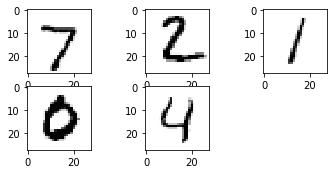

In [91]:
from matplotlib import pyplot

print(test_images[0].shape)

for i in range(0, 5):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(test_images[i].reshape(28, 28),cmap='Greys')